# Intro to Scikit Learn, part 2
### Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Note from last time on Linear Regression

1) sklearn.LinearRegression() object uses Ordinary Least Squares solver from scipy. Solves the normal form, using pseudoinverses.  (Does not use gradient descent.) 

2) To implememt gradient descent in sklearn use SGDClassifier which is an implementation of stochastic gradient descent, very generic one where you can choose your penalty terms. To obtain linear regression you choose loss to be 'squared_loss' (default) and penalty also to none (default).



In [2]:
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'
df = pd.read_csv(URL, header=None)
df.columns=["Population","Profit"]
X=df[["Population"]] 
Y=df["Profit"] 

In [3]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=0.001, max_iter=5000, tol=1e-3, penalty=None, eta0=0.1, loss='squared_loss')
sgd_reg.fit(X, Y.ravel())

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [4]:
print(sgd_reg.intercept_,sgd_reg.coef_)

[-3.73425826] [0.9501367]


## Logistic Regression Example


In [5]:
## Return to dataset from HW due Jan 20
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## What does our data look like?  ## What does include="all" do?
df.describe(include="all") # "all" allows for string data

,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [8]:
df['class'].unique() #find the different object in the data

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
## What doss the following command do? 
dfvirginica=df[df['class'] == 'Iris-virginica'] #boolean mask, create new data frame with new entreies with the boolean comes back as true

In [10]:
dfvirginica.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [11]:
X = df.iloc[:,0:4].to_numpy()
Y = df.iloc[:,4].to_numpy()
#X=df.iloc[:,0:4].values
#Y=df['class'].values

In [12]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

##Are these the shapes we want?

(150, 4)
<class 'numpy.ndarray'>
(150,)
<class 'numpy.ndarray'>


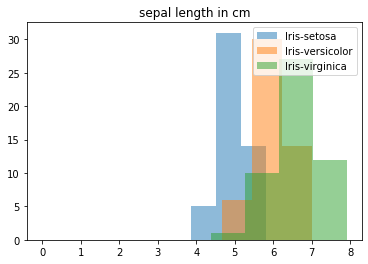

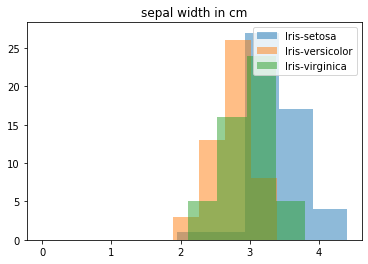

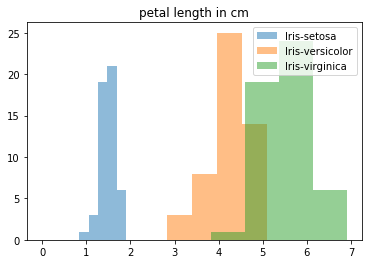

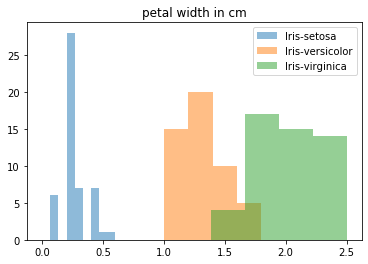

In [13]:
## From before, which feature seems to separate types of Iris?
import matplotlib.pyplot as plt
import numpy as np

features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
colors = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for col in range(4):
    loc = 0
    for key in colors:
        hist_data = X[Y==key, col]
        bins = np.linspace(0,np.max(hist_data),10)
        plt.hist(hist_data, bins, alpha=0.5, label=colors[loc])
        plt.legend(loc='upper right')
        plt.title(features[col])
        loc +=1
        
    plt.show()

### GOAL: Want to perform a classification with Logistic Regression to classify if Iris is Iris Virginica or not based on Petal Width.

Need X values to be matrix of petal width.

Need Y values to be 0 or 1 depending on Iris Virginica or not.

In [14]:
X = df["petal_wid"]

In [15]:
## Is this the shape we want?
X.shape

(150,)

In [16]:
## 
X=df[['petal_wid']]
X.shape

(150, 1)

Need to convert df['Class'] to a column of 0s and 1s. 

    =1 if Iris virginica, 

    =0 for either of other two categories

Pandas has a command for this: pd.get_dummies.

It will take all categorical 
data in dataframe and create columns of 0s and 1s. One column for each category.

In [17]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
pd.get_dummies?

In [19]:
pd.get_dummies(df,prefix=['class']).head()

,sepal_len,sepal_wid,petal_len,petal_wid,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [20]:
## Note we haven't added anything to dataframe.
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
y = pd.get_dummies(df,prefix=['class'])['class_Iris-virginica']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_Iris-virginica, dtype: uint8

In [22]:
y.shape

(150,)

In [23]:
y.unique()

array([0, 1], dtype=uint64)

In [24]:
X.head()

,petal_wid
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_Iris-virginica, dtype: uint8

In [26]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')
## solver specifices the type of optimization method to solve for thetas.
## at present, 'lbfgs' is recommended as default,
## but best choice will depend on data (especially size, but also other features such as sparsity)
log_reg.fit(X, y)  
##again, the .fit implements the LogisticRegression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
log_reg?

What are all the solver options?

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406


In [28]:
## Let's examine what it is using as a cutoff for making a prediction.
import numpy as np
## create random data from 0 to 3
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  
## .predict_proba  computes array for probability 
## of class 0 and probability of class 1
y_proba = log_reg.predict_proba(X_new)  
#log_reg.predict_proba?
print(X_new.shape)
print(y_proba.shape)
print(X_new[500],y_proba[500])

(1000, 1)
(1000, 2)
[1.5015015] [0.66563242 0.33436758]


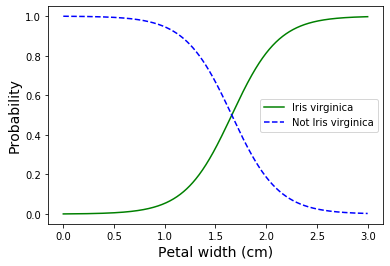

In [29]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend()
plt.show()

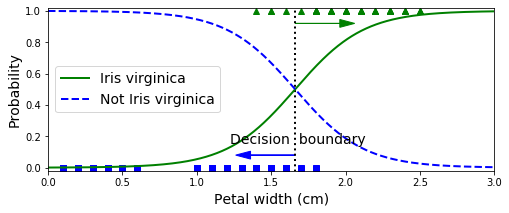

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

##calculates the decision boundary
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [31]:
## Can use .predict command to find classification based on input
log_reg.predict([[1.5],[1.6], [1.7]])

array([0, 0, 1], dtype=uint8)

In [32]:
decision_boundary

array([1.66066066])

## Example using two features

In [33]:
X = df[["petal_len","petal_wid"]].to_numpy()
X.shape

(150, 2)

In [46]:
y.shape
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: category, Length: 150, dtype: uint8


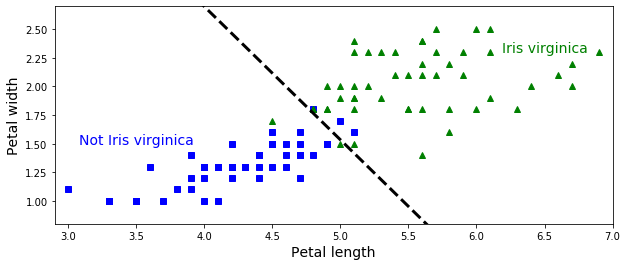

In [35]:
## Perform the Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

## Graph the data points, differentating between 0 class and 1 class
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

## plot decision boundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

## Label the graph
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## How many points did we get wrong?

In [36]:
y_pred=log_reg.predict(X)
score=(y_pred==y)
score.value_counts()

True     145
False      5
Name: class_Iris-virginica, dtype: int64

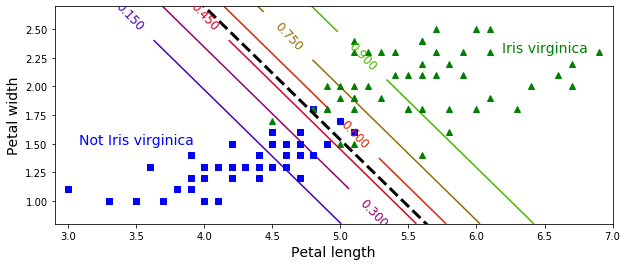

In [37]:
## Perform the Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

## ADD countour lines to the graph for probability cutoffs
    ## Create a grid for X0 and X1 values
x0, x1 = np.meshgrid(      
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]             ##np.c_ is a column stack
    ## Calculate the probabilities of both 0 and 1 for grid of X0,X1 values
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

## Graph the original points, differentating between 0 class and 1 class
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

## plot additional countour lines
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)


## plot decision boundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)


## Label the graph
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Multiclass Example

In [38]:
## Convert Y to 0,1,2 for multiclass
newdf=pd.get_dummies(df,prefix=['class'])
newdf.head()
newdf.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [39]:
newdf['category']=newdf['class_Iris-setosa']+2*newdf['class_Iris-versicolor']+3*newdf['class_Iris-virginica']-1
print(newdf['category'].unique())
y=newdf['category']

[0 1 2]


In [40]:
#softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
#softmax_reg.fit(X, y)

In [41]:
softmax_reg = LogisticRegression(multi_class="ovr",solver="lbfgs", random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

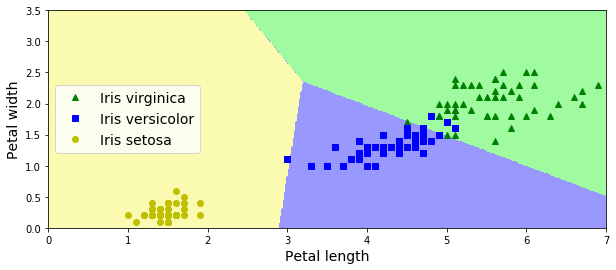

In [42]:
## plot data points
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

## plot predicted values to see softmax cutoffs
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.contourf(x0, x1, zz, cmap=custom_cmap)


## Add additional contour lines
#y_proba = softmax_reg.predict_proba(X_new)
#zz1 = y_proba[:, 1].reshape(x0.shape)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [43]:
softmax_reg.predict([[5, 2]])

array([2], dtype=uint8)

In [44]:
softmax_reg.predict_proba([[5, 2]])

array([[6.50132294e-04, 2.82402609e-01, 7.16947258e-01]])

## How many points did we get wrong?

In [45]:
y_pred=softmax_reg.predict(X)
score=(y_pred==y)
score.value_counts()

True     145
False      5
Name: category, dtype: int64